# **FINAL PROJECT ARTHA DATA - DATA SCIENCE BATCH 45**

**KELOMPOK 1 - ARTHA DATA**

Anggota Kelompok:
- Yoga Aprila
- Zaima Syarifa Asshafa
- Muhammad Fauzi Fayyad
- Moch Siswan Afandi
- Faris Rahmatullah
- Deni Yuniawan
- Rafa Kamila
- Nijma Fuaiyida Hanum

# STAGE 1 - DATA PRE-PROCESSING

## 1.Data Understanding


In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
# import data
df = pd.read_csv('https://raw.githubusercontent.com/Yogaaprila/MC_Data/main/marketing_campaign.csv',delimiter=';')

pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# See unique values in column
print(df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


#### Insight

1. The dataset consists of 2240 rows and 29 features.
2. Consists of features of type float64(1), int64(25), object(3).
3. There are features with inappropriate types, namely Dt_customer of type object but should be of type datetime. The transformation process will be carried out in the next stage.
4. There are missing values ​​in the income feature, but further checking is needed to see the data distribution and the selection of the right handling.
5. There is something interesting, where the Z_CostContact feature which is the Cost to contact a customer and the Z_Revenue feature which is the Revenue after client accepting campaign, have only 1 unique values, Z_CostContact is 3 and Z_Revenue is 11. This means that the amount of expenditure and income for each customer contacted and receiving the campaign is fixed.

### Understanding Numeric and Categorical Columns

In [ ]:
# numericals = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
#               if col not in ['ID', 'Year_Birth','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue']]
# categoricals = ['Education','Marital_Status']

In [ ]:
numericals = ['Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits',
              'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

categoricals = ['Kidhome', 'Teenhome', 'Education','Marital_Status', 'Response','AcceptedCmp1',
                'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
df.keys()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


In [ ]:
df[categoricals].describe().T

,count,mean,std,min,25%,50%,75%,max
Kidhome,2240.0,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.0,0.0,1.0,2.0
Response,2240.0,0.149107,0.356274,0.0,0.0,0.0,0.0,1.0
AcceptedCmp1,2240.0,0.064286,0.245316,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2240.0,0.013393,0.114976,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2240.0,0.072768,0.259813,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2240.0,0.074554,0.262728,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2240.0,0.072768,0.259813,0.0,0.0,0.0,0.0,1.0
Complain,2240.0,0.009375,0.096391,0.0,0.0,0.0,0.0,1.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.0,2.0,3.0,15.0


In [ ]:
df[['Marital_Status', 'Education']].describe().T

,count,unique,top,freq
Marital_Status,2240,8,Married,864
Education,2240,5,Graduation,1127


In [ ]:
# check value counts in categorical variables
for col in categoricals:
    print(df[col].value_counts().head(30))
    print('*****' * 10)

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
**************************************************
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
**************************************************
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
**************************************************
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
**************************************************
Response
0    1906
1     334
Name: count, dtype: int64
**************************************************
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
**************************************************
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
**************************************************
AcceptedCmp3
0    2077
1     163
Name: co

In [ ]:
# check value counts in categorical variables

for col in ['Marital_Status', 'Education']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts().head(30))
    print('*****' * 10)

Value counts for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
**************************************************
Value counts for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
**************************************************


Because several types of categorical values ​​were found to have the same meaning, a process of equalizing categories or mapping values ​​is required for the following features :
1. Marital_Status :
    - 'Married', 'Together'    : 'Married'
    - 'Single', 'Alone'        : 'Single'
    - 'Divorced', 'Widow'      : 'Divorce'
    - **'Absurd', 'YOLO'       : will be deleted**

    Since the value 'Absurd', 'YOLO' has an unclear meaning and only has a small number (4 rows), we will delete this data row in the next process.

2. Education :
    - 'Basic'                  : 'Basic'
    - 'Graduation'             : 'Bachelor'
    - '2n Cycle', 'Master'     : 'Master'
    - 'PhD'                    : 'PhD'

## 2.Data Cleansing

### A. Feature Data Type Transformation

In [ ]:
# Change the data type of the 'Dt_Customer' column from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print('Data Type of the Dt_Customer Columns is',df['Dt_Customer'].dtype)

Data Type of the Dt_Customer Columns is datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Changing and adjusting data types in a dataset is critical in data processing and machine learning modeling because it helps ensure the data is interpreted and used correctly by the algorithm.

### B. Mapping Values ​​Categorical Column (Marital_Status, 'Education')

In [ ]:
# Mapping similar categories to consistent categories
category_mapping = {
    'Single': 'Single',
    'Alone': 'Single',
    'Married': 'Married',
    'Together': 'Married',
    'Divorced': 'Divorced',
    'Widow': 'Divorced'
}
df['Marital_Status'] = df['Marital_Status'].map(category_mapping)

# Deleting rows with values ​​'YOLO' and 'Absurd'
df = df[~df['Marital_Status'].isin(['YOLO', 'Absurd'])]

# Mapping similar categories to consistent categories
category_mapping = {
    'Basic': 'Basic',
    'Graduation': 'Bachelor',
    '2n Cycle': 'Master',
    'Master': 'Master',
    'PhD': 'PhD'
}
df['Education'] = df['Education'].map(category_mapping)

# Show the values ​​after normalization
print("Nilai setelah normalisasi:")
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Nilai setelah normalisasi:
Marital_Status
Married     1444
Single       483
Divorced     309
Name: count, dtype: int64
Education
Bachelor    1127
Master       573
PhD          486
Basic         54
Name: count, dtype: int64


<!-- 2. Education :
    - 'Basic'                  : 'Basic'
    - 'Graduation'             : 'Bachelor'
    - '2n Cycle', 'Master'     : 'Master'
    - 'PhD'                    : 'PhD'
   -->

In [ ]:
# Mapping similar categories to consistent categories
category_mapping = {
    'Basic': 'Basic',
    'Graduation': 'Bachelor',
    'Master': 'Master',
    '2n Cycle': 'Master',
    'PhD': 'PhD'
}
df['Education'] = df['Education'].map(category_mapping)

# Show the values ​​after normalization
print("Nilai setelah normalisasi:")
print(df['Education'].value_counts())

Nilai setelah normalisasi:
Education
Bachelor    1127
Master       573
PhD          486
Basic         54
Name: count, dtype: int64


### C. Handle Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          4
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Missing Values Percentage
print(df.isnull().sum().to_frame('Missing Count').assign(Missing_Percentage=lambda x: (x['Missing Count'] / len(df)) * 100).round(2))

                     Missing Count  Missing_Percentage
ID                               0                0.00
Year_Birth                       0                0.00
Education                        0                0.00
Marital_Status                   4                0.18
Income                          24                1.07
Kidhome                          0                0.00
Teenhome                         0                0.00
Dt_Customer                      0                0.00
Recency                          0                0.00
MntWines                         0                0.00
MntFruits                        0                0.00
MntMeatProducts                  0                0.00
MntFishProducts                  0                0.00
MntSweetProducts                 0                0.00
MntGoldProds                     0                0.00
NumDealsPurchases                0                0.00
NumWebPurchases                  0                0.00
NumCatalog

Because the missing values ​​contained are only 1.07%, less than 5%, we can handle it by deleting rows with missing values.

In [ ]:
# Drop rows with any missing values, we save it in df2 as a cleaned dataset of missing values
df2 = df.dropna()

In [ ]:
print(df2.isnull().any())

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool


The data has been cleaned of missing values.

### D. Handle Duplicated Data

In [ ]:
# Check for duplicate rows
print(df2.duplicated().any())

False


There is no duplicate data.

### E. Handle Outliers

In [ ]:
df2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000
mean,5587.731917,1968.811031,52232.510850,0.442586,0.505425,2013-07-10 17:28:06.075949312,49.050633,305.030741,26.324593,166.970163,37.516275,27.047468,43.822333,2.321429,4.083183,2.668174,5.800181,5.320072,0.073689,0.074141,0.072785,0.063743,0.013562,0.009494,3.0,11.0,0.149638
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.750000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,173.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.500000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3247.944128,11.982065,25187.455359,0.537052,0.544258,NaN,28.940794,337.611255,39.781794,224.344950,54.558673,41.092454,51.623472,1.923511,2.741930,2.924378,3.253616,2.423445,0.261323,0.262060,0.259842,0.244350,0.115691,0.096994,0.0,0.0,0.356797


In [ ]:
# Membuat boxplot untuk kolom 'Year_Birth'
fig = px.box(df2, y='Year_Birth', points='all', title='Boxplot Year_Birth')
fig.show()

In [ ]:
# Membuat histogram untuk kolom 'Year_Birth'
fig = px.histogram(df2, x='Year_Birth', nbins=10, title='Histogram of Year of Birth',
                   labels={'Year_Birth': 'Year of Birth'}, color_discrete_sequence=['#1f77b4'])

fig.update_layout(
    title_text='Histogram of Year of Birth',
    xaxis_title_text='Year of Birth',
    yaxis_title_text='Count',
    bargap=0.2,
    template='plotly_white'
)

# Menampilkan histogram
fig.show()

In [ ]:
# Membuat boxplot untuk kolom 'income'
fig = px.box(df2, y='Income', points='all', title='Boxplot Income')
fig.show()

# Creating a DataFrame from spending data
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_melted1 = df2.melt(id_vars=[], value_vars=spending_columns, var_name='kategori', value_name='pengeluaran')
# Create boxplot
fig = px.box(df_melted1, x='kategori', y='pengeluaran', title='Boxplot Pengeluaran per Kategori Produk')
fig.show()

# Creating a DataFrame from purchases data
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_melted2 = df2.melt(id_vars=[], value_vars=purchase_columns, var_name='kategori', value_name='nilai')
# create boxplot
fig = px.box(df_melted2, x='kategori', y='nilai', title='Boxplot Purchase')
fig.show()

# create boxplot untuk kolom 'NumWebVisitsMonth'
fig = px.box(df2, y='NumWebVisitsMonth', points='all', title='Boxplot Web Visits Month')
fig.show()

In [ ]:
# Membuat boxplot untuk kolom 'income'
fig = px.box(df2, y='Income', points='all', title='Boxplot Income')
fig.show()

# Creating a DataFrame from spending data
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_melted1 = df2.melt(id_vars=[], value_vars=spending_columns, var_name='kategori', value_name='pengeluaran')
# Create boxplot
fig = px.box(df_melted1, x='kategori', y='pengeluaran', title='Boxplot Pengeluaran per Kategori Produk')
fig.show()

# Creating a DataFrame from purchases data
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_melted2 = df2.melt(id_vars=[], value_vars=purchase_columns, var_name='kategori', value_name='nilai')
# create boxplot
fig = px.box(df_melted2, x='kategori', y='nilai', title='Boxplot Purchase')
fig.show()

# create boxplot untuk kolom 'NumWebVisitsMonth'
fig = px.box(df2, y='NumWebVisitsMonth', points='all', title='Boxplot Web Visits Month')
fig.show()

In [ ]:
# # Define a function to detect outliers using IQR
# def detect_outliers_iqr(df2, column):
#     Q1 = df2[column].quantile(0.25)
#     Q3 = df2[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
#     return outliers

# # Define a function to remove outliers using IQR
# def remove_outliers_iqr(df2, column):
#     Q1 = df2[column].quantile(0.25)
#     Q3 = df2[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_out = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
#     return df_out

In [ ]:
# # Handle outliers for all numerical columns
# # numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns
# df_cleaned = df2.copy()

# for column in numericals:
#     df_cleaned = remove_outliers_iqr(df_cleaned, column)

# # Display the number of rows before and after removing outliers
# print("Number of rows before removing outliers:", df2.shape[0])
# print("Number of rows after removing outliers:", df_cleaned.shape[0])

In [ ]:
# df_cleaned.head()

It seems like handling these outliers requires more attention because we lost a lot of data, namely 1387 rows of data or almost 50% of it.

### F. Feature Transformation

### **Sebelum Feature Scaling**

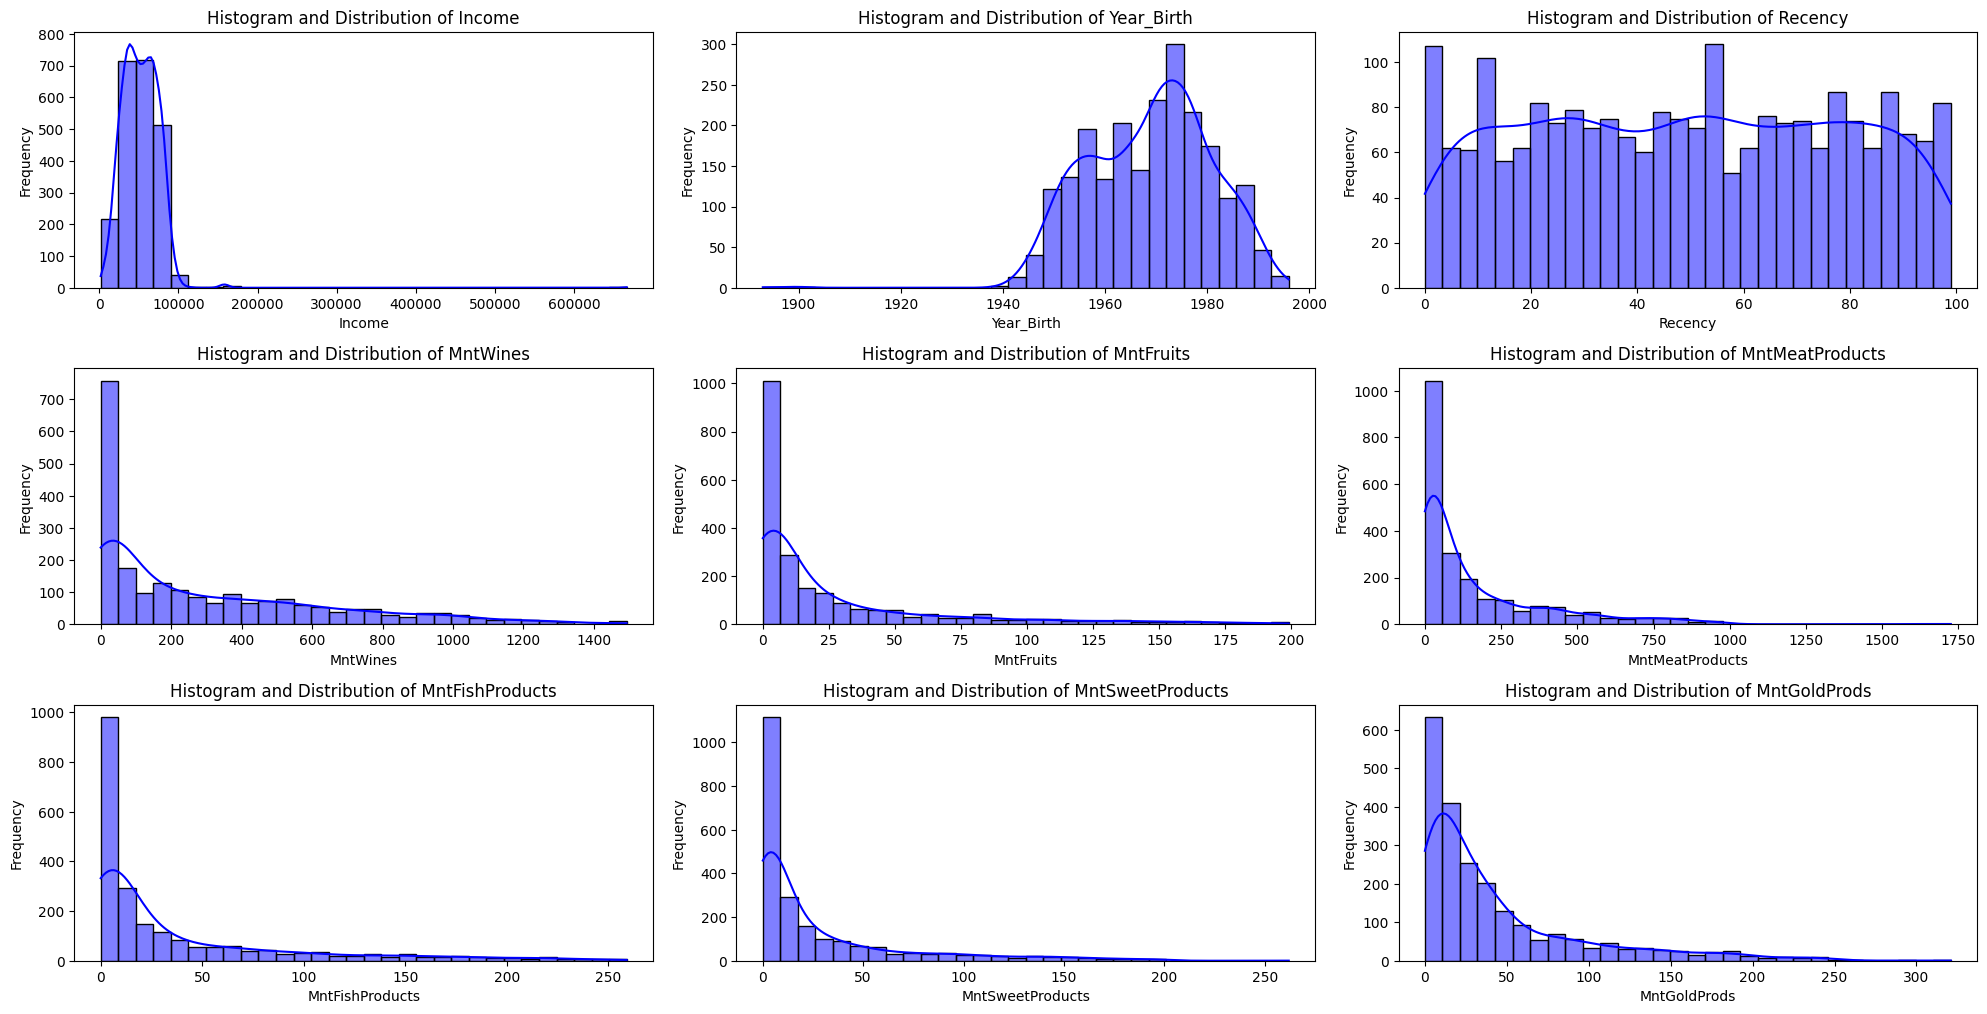

In [ ]:
# numericals = ['Year_Birth', 'Kidhome', 'Teenhome', 'Income', 'Recency',
#                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
#                   'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
#                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
#                   'NumWebVisitsMonth']

# fit plot size
plt.figure(figsize=(20, 30))

# Generate Histogram and Distribution Line for 'Numerical_cols'
for i, col in enumerate(numericals, 1):
    plt.subplot(9, 3, i)
    sns.histplot(df2[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram and Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

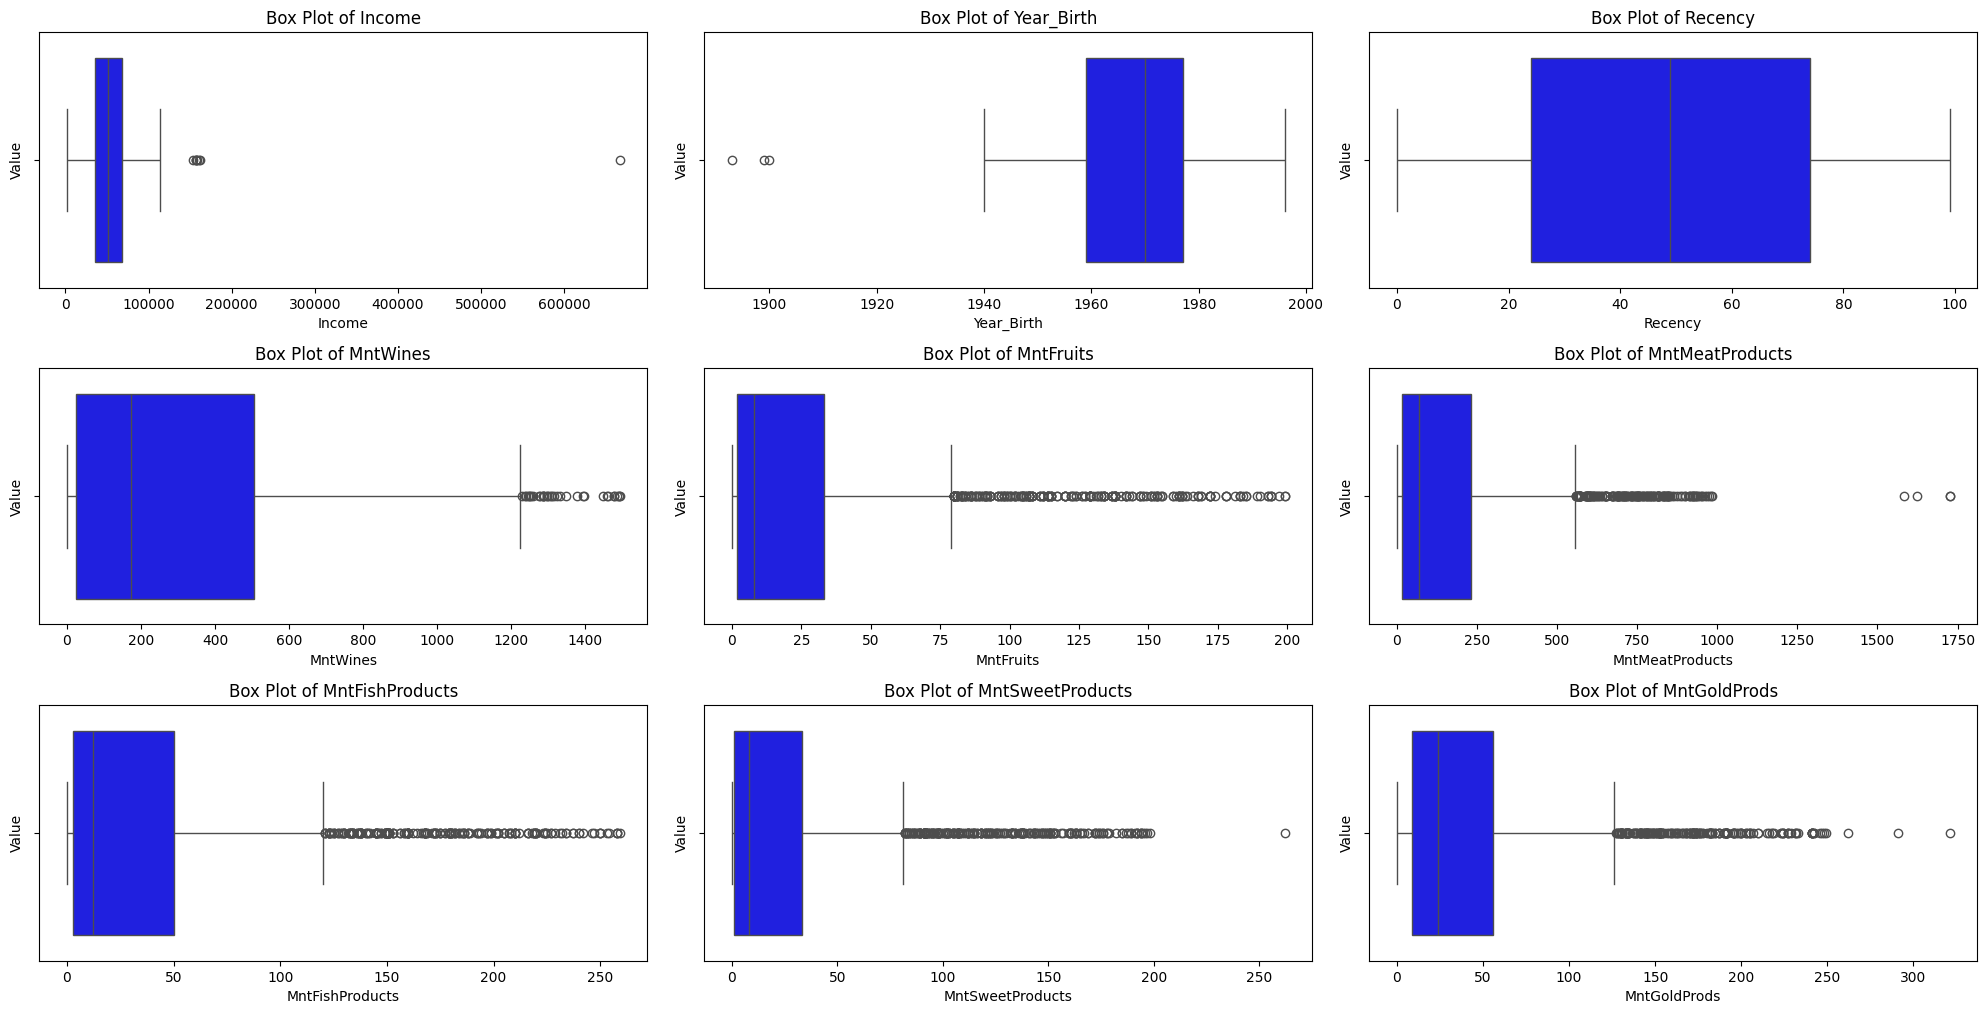

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit plot size
plt.figure(figsize=(20, 30))

# Generate Box Plot for 'numerical_cols'
for i, col in enumerate(numericals, 1):
    plt.subplot(9, 3, i)
    sns.boxplot(data=df2, x=col, color='blue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


### **Sesudah Feature Scaling**

In [ ]:
# Apply log transformation to reduce skewness for all numerical columns
for column in numericals:
    df2[column] = df2[column].apply(lambda x: np.log1p(x) if x > 0 else 0)  # Apply log1p (log(1 + x))

# Display the first few rows of the transformed dataframe
display(df2.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,7.579679,Bachelor,Single,10.970592,0,0,2012-09-04,4.077537,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,7.578145,Bachelor,Single,10.743869,1,1,2014-03-08,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,7.583756,Bachelor,Married,11.179046,0,0,2013-08-21,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,7.593374,Bachelor,Married,10.190432,1,0,2014-02-10,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,7.591862,PhD,Married,10.973254,1,0,2014-01-19,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,5,5,3,6,5,0,0,0,0,0,0,3,11,0


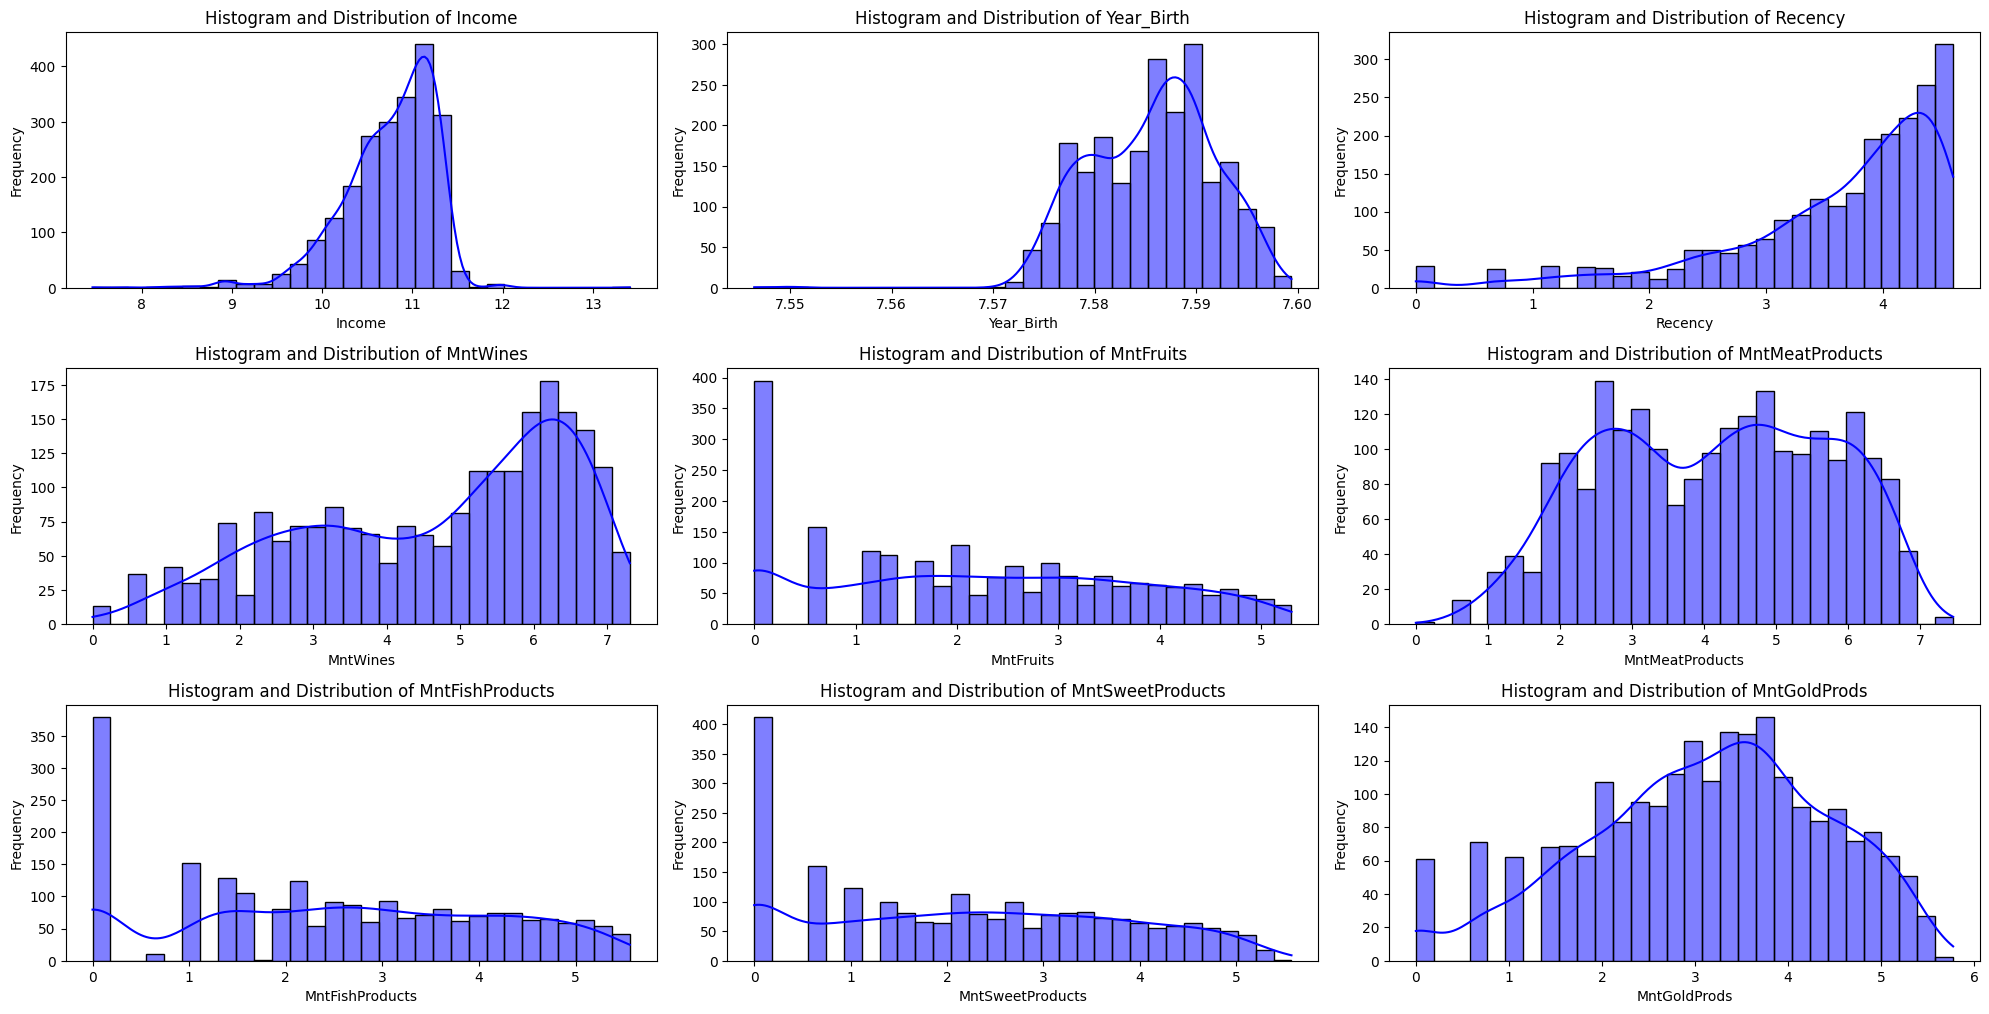

In [ ]:
# fit plot size
plt.figure(figsize=(20, 30))

# Generate Histogram and Distribution Line for 'Numerical_cols'
for i, col in enumerate(numericals, 1):
    plt.subplot(9, 3, i)
    sns.histplot(df2[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram and Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

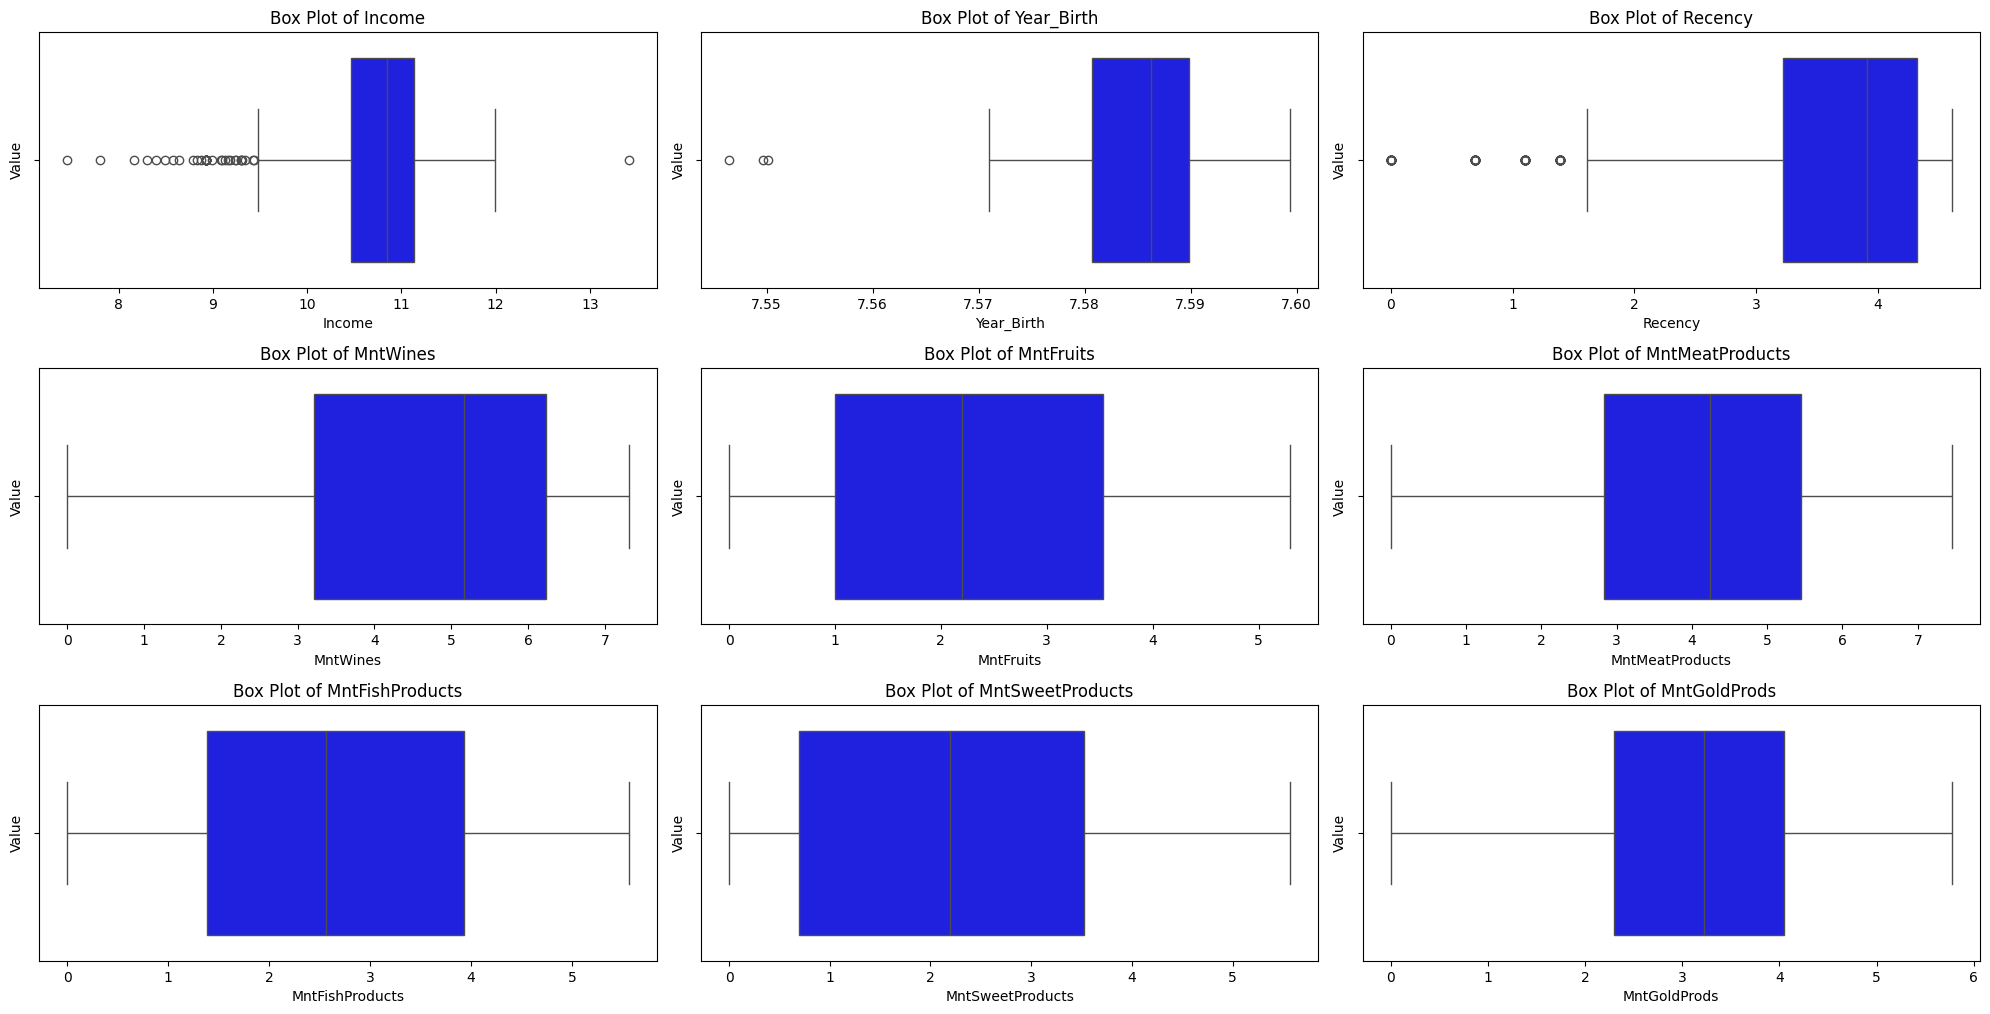

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit plot size
plt.figure(figsize=(20, 30))

# Generate Box Plot for 'numerical_cols'
for i, col in enumerate(numericals, 1):
    plt.subplot(9, 3, i)
    sns.boxplot(data=df2, x=col, color='blue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


### G. Feature Encoding

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df2' is your features DataFrame with the specified columns for ordinal label encoding
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Ordinal Label Encoding
ordinal_cols = {
    'Education': {'Basic': 0,
                  'Bachelor': 1,
                  'Master': 2,
                  'PhD': 3}
}

for col, mapping in ordinal_cols.items():
    if col in df2.columns:  # Check if the column exists in df2
        df2[col] = label_encoder.fit_transform(df2[col].map(mapping))
    else:
        print(f"Column '{col}' not found in df2.")

In [ ]:
display(df2.head(10))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,7.579679,1,Single,10.970592,0,0,2012-09-04,4.077537,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,7.578145,1,Single,10.743869,1,1,2014-03-08,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,7.583756,1,Married,11.179046,0,0,2013-08-21,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,7.593374,1,Married,10.190432,1,0,2014-02-10,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,7.591862,3,Married,10.973254,1,0,2014-01-19,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,7.584773,2,Married,11.043146,0,1,2013-09-09,2.833213,6.255750,3.761200,4.595120,0.000000,3.761200,2.708050,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,7.586804,1,Divorced,10.926586,0,1,2012-11-13,3.555348,5.463832,4.189655,5.105945,3.931826,3.912023,3.332205,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,7.593878,3,Married,10.417957,1,0,2013-05-08,3.496508,4.343805,2.397895,4.043051,1.386294,0.693147,3.178054,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,7.588324,3,Married,10.320618,1,0,2013-06-06,2.995732,2.708050,0.000000,3.218876,1.386294,1.386294,1.098612,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,7.576097,3,Married,8.639234,1,1,2014-03-13,4.234107,3.367296,0.000000,1.945910,0.693147,0.693147,2.639057,1,1,0,0,20,1,0,0,0,0,0,3,11,0


**One-Hot-Encoding**

In [ ]:
# # Nominal Label Encoding
# nominal_cols = {
#     'Marital_Status': {'Married': 'Married', 'Together': 'Together', 'Single': 'Single', 'Divorced': 'Divorced', 'Widow': 'Widow', 'Alone': 'Other', 'Absurd': 'Other',
#                       'YOLO': 'Other'}
#               }
# #MARRIED=TOGETHER, SINGLE=ALONE, DIVORCED=WIDOW,
# for col, mapping in nominal_cols.items():
#     df_cleaned[col] = df_cleaned[col].map(mapping)

In [ ]:
# check value counts in categorical variables
marital = ['Marital_Status']
for col in marital:
    print(df2[col].value_counts().head(30))
    print('*****' * 10)

Marital_Status
Married     1430
Single       474
Divorced     308
Name: count, dtype: int64
**************************************************


In [ ]:
df_cleaned = pd.get_dummies(df2, columns = ['Marital_Status'])
df_cleaned

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,5524,7.579679,1,10.970592,0,0,2012-09-04,4.077537,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,3,8,10,4,7,0,0,0,0,0,0,3,11,1,False,False,True
1,2174,7.578145,1,10.743869,1,1,2014-03-08,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,2,1,1,2,5,0,0,0,0,0,0,3,11,0,False,False,True
2,4141,7.583756,1,11.179046,0,0,2013-08-21,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,1,8,2,10,4,0,0,0,0,0,0,3,11,0,False,True,False
3,6182,7.593374,1,10.190432,1,0,2014-02-10,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,2,2,0,4,6,0,0,0,0,0,0,3,11,0,False,True,False
4,5324,7.591862,3,10.973254,1,0,2014-01-19,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,5,5,3,6,5,0,0,0,0,0,0,3,11,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,7.584773,1,11.022295,0,1,2013-06-13,3.850148,6.565265,3.784190,5.209486,3.761200,4.779123,5.513429,2,9,3,4,5,0,0,0,0,0,0,3,11,0,False,True,False
2236,4001,7.574045,3,11.066873,2,1,2014-06-10,4.043051,6.008813,0.000000,3.433987,0.000000,0.000000,2.197225,7,8,2,5,7,0,0,0,1,0,0,3,11,0,False,True,False
2237,7270,7.591862,1,10.950491,0,0,2014-01-25,4.521789,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,1,2,3,13,6,0,1,0,0,0,0,3,11,0,True,False,False
2238,8235,7.579168,2,11.145421,0,1,2014-01-24,2.197225,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,2,6,5,10,3,0,0,0,0,0,0,3,11,0,False,True,False


In [ ]:
# List of boolean columns to convert to integers
boolean_cols = ['Marital_Status_Divorced', 'Marital_Status_Married','Marital_Status_Single']

# Convert boolean columns to integers (0s and 1s)
df_cleaned[boolean_cols] = df_cleaned[boolean_cols].astype(int)
df_cleaned

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,5524,7.579679,1,10.970592,0,0,2012-09-04,4.077537,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,0,1
1,2174,7.578145,1,10.743869,1,1,2014-03-08,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,0,1
2,4141,7.583756,1,11.179046,0,0,2013-08-21,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,1,0
3,6182,7.593374,1,10.190432,1,0,2014-02-10,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,1,0
4,5324,7.591862,3,10.973254,1,0,2014-01-19,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,7.584773,1,11.022295,0,1,2013-06-13,3.850148,6.565265,3.784190,5.209486,3.761200,4.779123,5.513429,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0,1,0
2236,4001,7.574045,3,11.066873,2,1,2014-06-10,4.043051,6.008813,0.000000,3.433987,0.000000,0.000000,2.197225,7,8,2,5,7,0,0,0,1,0,0,3,11,0,0,1,0
2237,7270,7.591862,1,10.950491,0,0,2014-01-25,4.521789,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1,0,0
2238,8235,7.579168,2,11.145421,0,1,2014-01-24,2.197225,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0,1,0


In [ ]:
# Assuming 'df_cleaned' is your DataFrame
# Get the list of columns
columns = list(df_cleaned.columns)

# Move 'Response' to the last position
columns.remove('Response')
columns.append('Response')

# Rearrange the columns in the DataFrame
df_cleaned = df_cleaned[columns]

# Check the updated DataFrame information
df_cleaned

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Response
0,5524,7.579679,1,10.970592,0,0,2012-09-04,4.077537,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,3,8,10,4,7,0,0,0,0,0,0,3,11,0,0,1,1
1,2174,7.578145,1,10.743869,1,1,2014-03-08,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,1,0
2,4141,7.583756,1,11.179046,0,0,2013-08-21,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1,0,0
3,6182,7.593374,1,10.190432,1,0,2014-02-10,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,0,0
4,5324,7.591862,3,10.973254,1,0,2014-01-19,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,7.584773,1,11.022295,0,1,2013-06-13,3.850148,6.565265,3.784190,5.209486,3.761200,4.779123,5.513429,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1,0,0
2236,4001,7.574045,3,11.066873,2,1,2014-06-10,4.043051,6.008813,0.000000,3.433987,0.000000,0.000000,2.197225,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1,0,0
2237,7270,7.591862,1,10.950491,0,0,2014-01-25,4.521789,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,1,2,3,13,6,0,1,0,0,0,0,3,11,1,0,0,0
2238,8235,7.579168,2,11.145421,0,1,2014-01-24,2.197225,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1,0,0


### H. Handle Class Imbalance

In [ ]:
# Counts values of response (0 dan 1)
counts = df_cleaned['Response'].value_counts().sort_index()
labels = ['NO' if label == 0 else 'YES' for label in counts.index]
colors = ['#C40C0C' if label == 'NO' else '#5463FF' for label in labels]

# Create diagram
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=counts,
    hole=.3,
    textinfo='percent+label',
    textfont=dict(size=15, color='white', family='Arial, sans-serif'),
    insidetextfont=dict(size=15, color='white', family='Arial, sans-serif'),
    marker=dict(colors=colors)
)])
fig.update_layout(title_text="Distribution of Response")
fig.show()

**INSIGHT**

Significant class imbalance, with a distribution of YES 15% and NO 85%, the model may tend to be biased towards the majority class (NO), causing poor performance in predicting the minority class (YES).

**HANDLING** : The most recommended handling is oversampling for the minority class (YES). Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can help increase the number of examples for the minority class by generating synthetic examples, thereby increasing the balance in the dataset. This is often effective in improving model performance on the minority class without reducing the amount of data from the majority class.

In [ ]:
# Memisahkan fitur dengan label
X = df_cleaned.drop(columns=['Response', 'Dt_Customer'])
y = df_cleaned['Response'].values

Date Time dihapus karena menyebabkan tidak bisa jalan

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2212 non-null   int64  
 1   Year_Birth               2212 non-null   float64
 2   Education                2212 non-null   int64  
 3   Income                   2212 non-null   float64
 4   Kidhome                  2212 non-null   int64  
 5   Teenhome                 2212 non-null   int64  
 6   Recency                  2212 non-null   float64
 7   MntWines                 2212 non-null   float64
 8   MntFruits                2212 non-null   float64
 9   MntMeatProducts          2212 non-null   float64
 10  MntFishProducts          2212 non-null   float64
 11  MntSweetProducts         2212 non-null   float64
 12  MntGoldProds             2212 non-null   float64
 13  NumDealsPurchases        2212 non-null   int64  
 14  NumWebPurchases          2212

### Jumlah Data antar kelas Sebelum SMOTE

In [ ]:
# Count The amount of data for each class
from collections import Counter

print("The amount of data for each class (IQR):", Counter(y))

The amount of data for each class (IQR): Counter({0: 1881, 1: 331})


### Jumlah Data antar kelas Setelah SMOTE

Response
0    1881
1     940
Name: count, dtype: int64


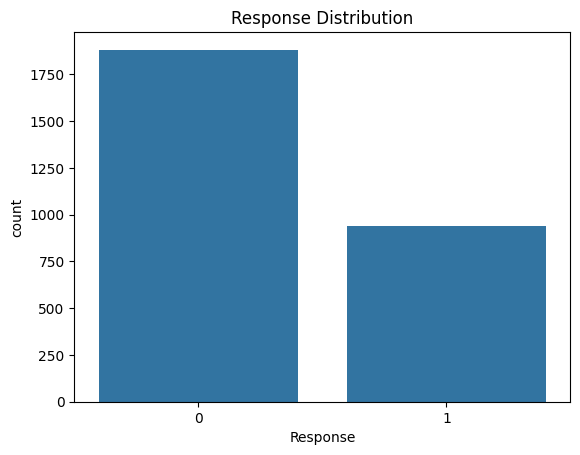

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

# Hitung jumlah sampel dalam masing-masing kelas
from collections import Counter
counter = Counter(y)
majority_class = max(counter, key=counter.get)
minority_class = min(counter, key=counter.get)
n_majority = counter[majority_class]

# Tentukan rasio oversampling yang diinginkan (1:2)
sampling_strategy = {minority_class: int(n_majority / 2)}

# Inisialisasi SMOTE dengan sampling_strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Terapkan SMOTE
X_res, y_res = smote.fit_resample(X, y)

# Konversi kembali ke DataFrame
df_new = pd.DataFrame(X_res, columns=X.columns)
df_new['Response'] = y_res

# Tampilkan distribusi kelas setelah oversampling
print(df_new['Response'].value_counts())

# Visualisasikan distribusi kelas
sns.countplot(x='Response', data=df_new)
plt.title('Response Distribution')
plt.show()

### Mengatasi Ketidakseimbangan Kelas dengan SMOTE

Ketidakseimbangan kelas dalam dataset dapat berdampak signifikan pada kinerja model, seringkali menyebabkan prediksi yang bias terhadap kelas mayoritas. Untuk mengurangi masalah ini, kami menggunakan Teknik Oversampling Minoritas Sintetis (SMOTE).

#### SMOTE: Sekilas Pandang

SMOTE adalah metode oversampling yang membuat contoh sintetis dari kelas minoritas. Berbeda dengan duplikasi sederhana, SMOTE menghasilkan instance baru dengan menginterpolasi antara sampel kelas minoritas yang ada. Pendekatan ini:

- Meningkatkan representasi kelas minoritas
- Menambah variabilitas ke dataset
- Membantu mencegah overfitting yang dapat terjadi dengan oversampling sederhana

#### Penerapan dan Hasil

Setelah menerapkan feature scaling (fungsi logaritma) untuk penanganan outlier, kami mengimplementasikan SMOTE untuk menyeimbangkan dataset kami. Hasilnya adalah sebagai berikut:

```python
Counter({0: 1881, 1: 940})

## 3.Feature Engineering

### A. Feature Selection

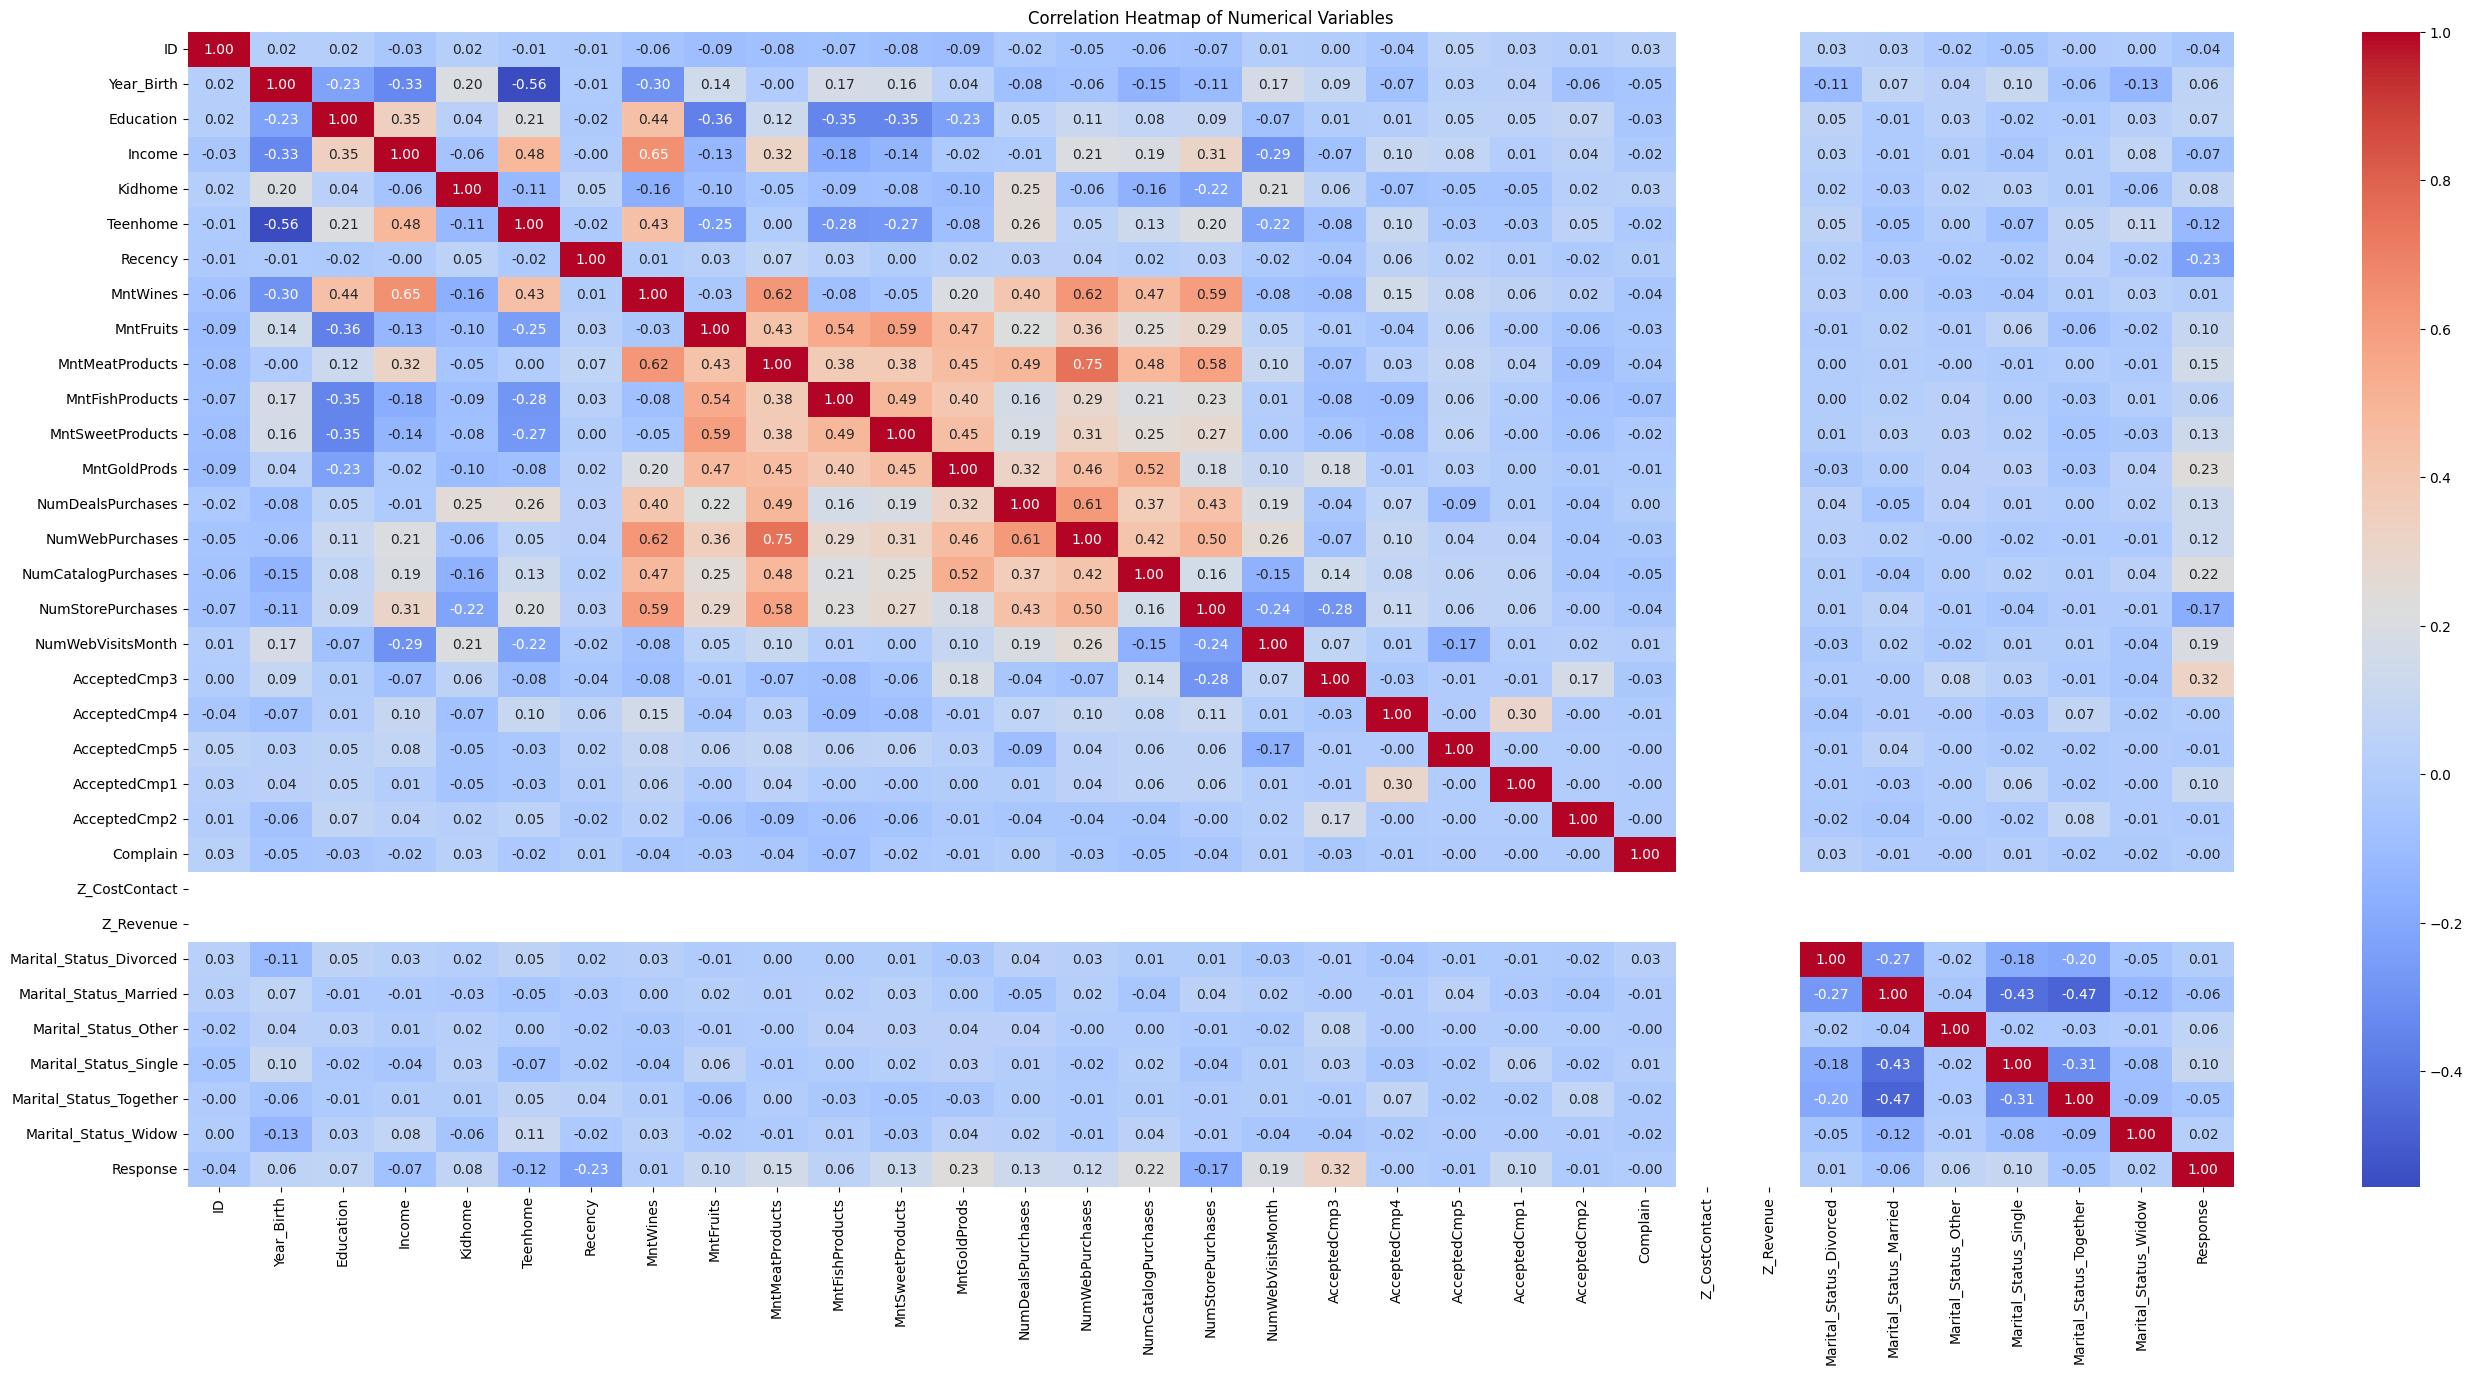

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned_concat is your cleaned DataFrame after outlier removal
# Select numerical variables
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Determine the appropriate figure size based on the number of numerical variables
num_vars = len(numeric_cols.columns)
fig_height = max(min(0.5 * num_vars, 15), 8)  # Adjust this multiplier and the minimum and maximum values as needed

# Create a heatmap with the determined figure size
plt.figure(figsize=(num_vars, fig_height))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Get the absolute values of the correlation matrix to consider both positive and negative correlations
abs_correlation_matrix = correlation_matrix.abs()

# Get the highest correlation for each variable
highest_correlation = abs_correlation_matrix.apply(lambda x: x[x != 1].max())

# Create a DataFrame or table to display the highest correlation for each variable
highest_correlation_df = pd.DataFrame(highest_correlation, columns=['Highest Correlation'])
highest_correlation_df.index.name = 'Variable'
highest_correlation_df.reset_index(inplace=True)

# Sort the DataFrame by highest correlation values in descending order
highest_correlation_df_sorted = highest_correlation_df.sort_values(by='Highest Correlation', ascending=False)

highest_correlation_df_sorted

,Variable,Highest Correlation
9,MntMeatProducts,0.749304
14,NumWebPurchases,0.749304
3,Income,0.645591
7,MntWines,0.645591
13,NumDealsPurchases,0.608720
16,NumStorePurchases,0.594127
8,MntFruits,0.586956
11,MntSweetProducts,0.586956
1,Year_Birth,0.555509
5,Teenhome,0.555509


### Introduction Variance Inflation Factor

Variance Inflation Factor (VIF) is a measure used to detect the presence and severity of multicollinearity in a set of multiple regression variables. VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity with other variables in the model.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Create a DataFrame containing only the numerical variables
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
num_var_imputed = pd.DataFrame(imputer.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = num_var_imputed.columns
vif_data["VIF"] = [variance_inflation_factor(num_var_imputed.values, i) for i in range(num_var_imputed.shape[1])]

# Sort the VIF DataFrame from highest to lowest multicollinearity
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display the sorted VIF DataFrame
print(vif_data)

                   Variable       VIF
27   Marital_Status_Married       inf
28     Marital_Status_Other       inf
29    Marital_Status_Single       inf
30  Marital_Status_Together       inf
26  Marital_Status_Divorced       inf
31     Marital_Status_Widow       inf
7                  MntWines  7.071846
9           MntMeatProducts  4.122568
16        NumStorePurchases  3.983787
14          NumWebPurchases  3.979957
13        NumDealsPurchases  3.441493
3                    Income  2.917225
15      NumCatalogPurchases  2.763626
5                  Teenhome  2.544182
8                 MntFruits  2.181570
12             MntGoldProds  2.061648
11         MntSweetProducts  2.022596
17        NumWebVisitsMonth  1.987981
10          MntFishProducts  1.872761
2                 Education  1.793501
4                   Kidhome  1.667564
1                Year_Birth  1.623211
32                 Response  1.446000
18             AcceptedCmp3  1.347851
19             AcceptedCmp4  1.190583
21          

### Variance Inflation Factor (VIF) Analysis

Interpretation Guidelines

| VIF Range | Interpretation |
|-----------|----------------|
| VIF = 1 | No multicollinearity. The variable is not correlated with other variables. |
| 1 < VIF < 5 | Moderate multicollinearity. The variable is moderately correlated with other variables. |
| VIF >= 5 | High multicollinearity. The variable is highly correlated with other variables and might pose issues in regression analysis. |

VIF Analysis Results

| Variable | VIF Value | Interpretation |
|----------|-----------|----------------|
| ID | 1.031146 | No multicollinearity |
| Year_Birth | 1.590668 | Moderate multicollinearity |
| Education | 1.779657 | Moderate multicollinearity |
| Income | 2.886554 | Moderate multicollinearity, approaching concern |
| Kidhome | 1.658701 | Moderate multicollinearity |
| Teenhome | 2.538810 | Moderate multicollinearity |
| Recency | 1.101908 | No multicollinearity |
| MntWines | 7.036737 | High multicollinearity |
| MntFruits | 2.164306 | Moderate multicollinearity |
| MntMeatProducts | 4.101483 | Moderate multicollinearity, nearing concern |
| MntFishProducts | 1.860955 | Moderate multicollinearity |
| MntSweetProducts | 2.013997 | Moderate multicollinearity |
| MntGoldProds | 2.048903 | Moderate multicollinearity |
| NumDealsPurchases | 3.399733 | Moderate multicollinearity |
| NumWebPurchases | 3.967275 | Moderate multicollinearity, nearing concern |
| NumCatalogPurchases | 2.758604 | Moderate multicollinearity |
| NumStorePurchases | 3.969987 | Moderate multicollinearity, nearing concern |
| NumWebVisitsMonth | 1.982155 | Moderate multicollinearity |
| AcceptedCmp3 | 1.335881 | Moderate multicollinearity |
| AcceptedCmp4 | 1.181824 | No multicollinearity |
| AcceptedCmp5 | 1.085705 | No multicollinearity |
| AcceptedCmp1 | 1.136293 | No multicollinearity |
| AcceptedCmp2 | 1.077969 | No multicollinearity |
| Complain | 1.028383 | No multicollinearity |
| Z_CostContact | 0.000000 | Perfect multicollinearity |
| Z_Revenue | 0.000000 | Perfect multicollinearity |
| Response | 1.434965 | Moderate multicollinearity |


### Handling

1. **High VIF values**: For variables like `MntWines` with a VIF above 5, consider removing them from the model or combining them with other variables to reduce multicollinearity.

2. **Constant Variables**: `Z_CostContact` and `Z_Revenue` have VIF values of 0, indicating no variability. These variables should be removed as they do not provide any information to the model.

3. **Moderate VIF values**: While moderate VIF values are usually acceptable, you should still be cautious with variables approaching a VIF of 5. Consider checking for potential relationships among these variables and possibly using dimensionality reduction techniques (e.g., PCA) if necessary.

In [ ]:
# Drop features 'ID', 'Z_CostContact', dan 'Z_Revenue'
df2 = df2.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])
df2.info()

### B. Feature Extraction

In [ ]:
import pandas as pd
from datetime import datetime

# Convert Dt_Customer to datetime
# df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'])
# current_date = datetime.now()
# df_cleaned['Customer_Tenure'] = (current_date - df_cleaned['Dt_Customer']).dt.days

# Calculate age
df_cleaned['Age'] = current_date.year - df_cleaned['Year_Birth']

# Income per capita
df_cleaned['Income_Per_Capita'] = df_cleaned['Income'] / (1 + df_cleaned['Kidhome'] + df_cleaned['Teenhome'])

# Total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_cleaned['Total_Spending'] = df_cleaned[spending_columns].sum(axis=1)

# Spending ratios
for col in spending_columns:
    df_cleaned[f'{col}_Ratio'] = df_cleaned[col] / df_cleaned['Total_Spending']

# Average monthly spending
df_cleaned['Average_Monthly_Spending'] = df_cleaned['Total_Spending'] / (df_cleaned['Customer_Tenure'] / 30)

# Total purchases and ratios
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_cleaned['Total_Purchases'] = df_cleaned[purchase_columns].sum(axis=1)
df_cleaned['Web_vs_Store_Ratio'] = df_cleaned['NumWebPurchases'] / df_cleaned['NumStorePurchases']
df_cleaned['Deal_Purchase_Ratio'] = df_cleaned['NumDealsPurchases'] / df_cleaned['Total_Purchases']

# Total kid in customer’s household
kid_columns = ['Kidhome', 'Teenhome']
df_cleaned['Total_Kid'] = df_cleaned[kid_columns].sum(axis=1)

# Campaign response
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_cleaned['Campaign_Acceptance_Count'] = df_cleaned[campaign_columns].sum(axis=1)
df_cleaned['Response_Rate'] = df_cleaned['Campaign_Acceptance_Count'] / len(campaign_columns)

# # One-hot encoding categorical variables
# df_cleaned = pd.get_dummies(df_cleaned, columns=['Marital_Status'], drop_first=True)

# # High-value customer
# high_value_threshold = df_cleaned['Total_Spending'].quantile(0.8)
# df_cleaned['High_Value_Customer'] = (df_cleaned['Total_Spending'] > high_value_threshold).astype(int)

In [ ]:
# Final DataFrame
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Income_Per_Capita,Total_Spending,MntWines_Ratio,MntFruits_Ratio,MntMeatProducts_Ratio,MntFishProducts_Ratio,MntSweetProducts_Ratio,MntGoldProds_Ratio,Average_Monthly_Spending,Total_Purchases,Web_vs_Store_Ratio,Deal_Purchase_Ratio,Campaign_Acceptance_Count,Response_Rate
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3800,70,15448.0,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0.213158,6,0.500000,0.333333,0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3826,40,13323.0,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0.415578,8,0.500000,0.250000,0,0.0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,4104,39,16727.0,169,0.449704,0.059172,0.331361,0.017751,0.005917,0.136095,1.235380,10,1.000000,0.200000,0,0.0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,4075,50,15175.5,46,0.304348,0.000000,0.521739,0.065217,0.065217,0.043478,0.338650,6,1.500000,0.166667,0,0.0
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0,4280,48,7500.0,61,0.098361,0.262295,0.180328,0.180328,0.016393,0.262295,0.427570,6,0.666667,0.166667,0,0.0



Feature extraction is a critical step in data preprocessing that involves transforming raw data into a set of features that better represent the underlying problem to predictive models. Here’s a detailed analysis of potential feature extraction techniques for our dataset:

1.   **Date-Based Features:**

*   **Customer Tenure:** Convert Dt_Customer to a datetime object and calculate the tenure of each customer (current date - Dt_Customer). This can help capture customer loyalty and engagement duration.
Age: Calculate the age of the customer using Year_Birth (current year - Year_Birth).


2.   **Income-Based Features:**
*   **Income Per Capita:** Calculate the income per household member. Income_Per_Capita = Income / (1 + Kidhome + Teenhome). This normalizes income by family size, which can impact spending behavior.


3.   **Spending Patterns:**

*   **Total Spending:** Sum of all product-related columns (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds). This gives an overall spending metric.
*   **Category Spending Ratios:** Create ratios of spending in each category to total spending. For example, Wine_Spending_Ratio = MntWines / Total_Spending. This can help understand preferences.
*   **Average Monthly Spending:** Assuming the dataset covers a specific period, calculate average monthly spending by dividing total spending by tenure in months.

4.   **Purchase Behavior:**

*   **Total Purchases:** Sum of all purchase-related columns (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases).
*   **Web vs. Store Purchases Ratio:** Ratio of web purchases to store purchases (NumWebPurchases / NumStorePurchases). This indicates the preference for online vs. in-store shopping.
*   **Deal Purchase Ratio:** Ratio of purchases made during deals to total purchases (NumDealsPurchases / Total_Purchases).

5.   **Campaign Response:**

*   **Campaign Acceptance Count:** Sum of all campaign-related columns (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5). This can be an indicator of how responsive the customer is to marketing efforts.
*   **Response Rate:** Calculate the response rate to campaigns (total campaign responses / total campaigns).

### C. Additional Feature

1. Customer Lifetime Value (CLV) Prediction

Required Features:
- Historical purchase data (transaction dates, amounts)
- Purchase frequency (number of transactions per customer)
- Average order value (total amount spent divided by the number of transactions)

Explanation:
CLV predicts the total profit a customer will bring to the business over their entire relationship. It combines historical purchase data, purchase frequency, and average order value to estimate future revenue. High CLV indicates valuable customers worth investing in for retention and targeted marketing strategies.

2. Social Media Engagement Score

Required Features:
- Social media interaction data (likes, shares, comments, posts)
- Customer IDs linked to social media accounts

Explanation:
This score measures a customer’s interaction with the brand on social media platforms. By analyzing likes, shares, comments, and posts, businesses can gauge the level of engagement and brand loyalty. Higher engagement scores often correlate with increased brand advocacy and potential future purchases.

3. Product Affinity Scores

Required Features:
- Purchase history (product categories, purchase amounts)
- Customer IDs

Explanation:
Product Affinity Scores reflect a customer’s preference for different product categories based on their purchase history. By understanding these preferences, businesses can tailor marketing efforts and product recommendations to align with individual customer tastes, leading to more personalized and effective marketing strategies.

4. Sentiment Analysis of Customer Reviews

Required Features:
- Customer reviews or feedback text
- Sentiment analysis tool or library (e.g., VADER, TextBlob, or custom NLP model)

Explanation:
Sentiment analysis evaluates customer reviews to determine the overall sentiment (positive, negative, neutral). This analysis provides insights into customer satisfaction and areas needing improvement. Positive sentiment can indicate high satisfaction and loyalty, while negative sentiment can highlight issues that need addressing to improve customer experience.

These features help in creating a more nuanced understanding of customers, enhancing predictive models, and informing strategic decisions in marketing and customer relationship management.